In [68]:
import time
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib

In [13]:
# We want to build a list of 17 digit integers and strings
min_range_start = 1000000000000000
max_range_start = (min_range_start * 10 - 1)


In [14]:
num_list = []
for i in range(100000):
    num_list.append(random.randint(min_range_start, max_range_start))

str_list = []
for i in range(100000):
    str_list.append(random.randint(min_range_start, max_range_start))

In [15]:
num_time_list = []

for i in range(100000):
    x = random.randint(min_range_start,max_range_start)
    t1 = time.time()
    if( x in num_list):
        t2 = time.time()
        num_time_list.append(int((t2-t1)*1000*1000)) # micro-seconds
    else:
        t2 = time.time()
        num_time_list.append(int((t2-t1)*1000*1000)) 


In [16]:

str_time_list = []

for i in range(100000):
    x = str(random.randint(min_range_start,max_range_start))
    t1 = time.time()
    if( x in str_list ):
        t2 = time.time()
        str_time_list.append(int((t2-t1)*1000*1000))
    else:
        t2 = time.time()
        str_time_list.append(int((t2-t1)*1000*1000))

In [17]:
df = pd.DataFrame( { "int_time" : num_time_list, "str_time" : str_time_list}, columns=["int_time", "str_time"])

In [18]:
df.describe()


,int_time,str_time
count,100000.000000,100000.000000
mean,571.120300,869.489630
std,30.657322,20.553657
min,553.000000,856.000000
25%,562.000000,861.000000
50%,565.000000,864.000000
75%,576.000000,873.000000
max,3978.000000,2962.000000


In [20]:
# load this after you've run the main.js (see the main.js file for instructions)

from numpy import loadtxt
file = open("int_timings.txt","r")
js_int_timings = loadtxt(file,delimiter=",")

In [22]:
from numpy import loadtxt
file = open("str_timings.txt","r")
str_int_timings = loadtxt(file,delimiter=",")

In [23]:
df2 = pd.DataFrame( { "js_int_time" : js_int_timings, "js_str_time" : str_int_timings})

In [24]:
df2.describe()

,js_int_time,js_str_time
count,100000.000000,100000.000000
mean,64.815700,408.222700
std,5.132066,42.584335
min,62.000000,312.000000
25%,64.000000,388.000000
50%,64.000000,391.000000
75%,64.000000,409.000000
max,1210.000000,2737.000000


In [25]:
cf = pd.concat([df,df2], axis=1)

In [29]:
cf.describe()

,int_time,str_time,js_int_time,js_str_time
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,571.120300,869.489630,64.815700,408.222700
std,30.657322,20.553657,5.132066,42.584335
min,553.000000,856.000000,62.000000,312.000000
25%,562.000000,861.000000,64.000000,388.000000
50%,565.000000,864.000000,64.000000,391.000000
75%,576.000000,873.000000,64.000000,409.000000
max,3978.000000,2962.000000,1210.000000,2737.000000


In [62]:
# if you want to see which fonts are accessible for you
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")



'/System/Library/Fonts/Supplemental/Arial.ttf'

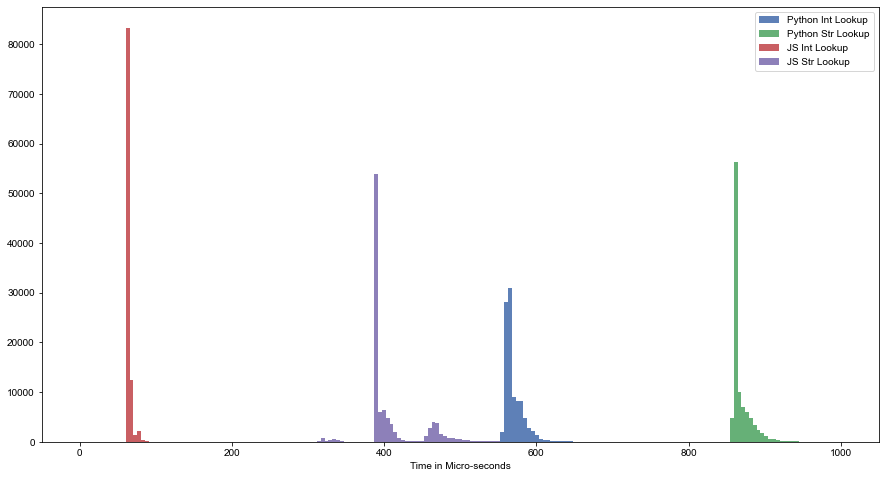

In [67]:

bins = np.linspace(0, 1000, 200) # generate 200 equal bins from 0 to 1000

matplotlib.rcParams['font.family'] = "Arial"

pyplot.style.use("seaborn-deep")
pyplot.figure(figsize=(15,8))
pyplot.hist(cf.int_time, bins, alpha=0.9, label='Python Int Lookup')
pyplot.hist(cf.str_time, bins, alpha=0.9, label='Python Str Lookup')
pyplot.hist(cf.js_int_time, bins, alpha=0.9, label='JS Int Lookup')
pyplot.hist(cf.js_str_time, bins, alpha=0.9, label='JS Str Lookup')
pyplot.xlabel("Time in Micro-seconds", fontsize="10")

pyplot.legend(loc='upper right')
pyplot.show()
